# Python Homework Simple Neural Processing WEEK 9

![](w9hw.png)

<b>Questions:</b><br>
1. What are the dimensions of the matrices you will use to represent your model (inputs, parameters, and 
outputs)? How will you integrate the concept of mini-batch training? <br>
2. How to check whether or not you should keep training your model? <br>
<b>Complete Homework with following steps: </b><br>
1. As a first step, use MLP with 2 hidden layers containing 6 and 4 units respectively. Do not use pytorch, 
keras, tensorflow or any other libraries. You should create NN from scratch. <br>
2. Name your final homework Script as “Heart_diseases”. <br>
3. Create repository named “heart_diseases_2_hidden” in your Github account and push your homework Script 
to this repository. <br>
4. Fork other users’ repositories, make pull requests (at least one, making three pull requests is desirable). <br>
<b>Note: Your pull requests should either fix problems or add new features.</b><br>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('heart.csv')
df = data.copy()

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.isnull().sum().any()

False

<AxesSubplot:>

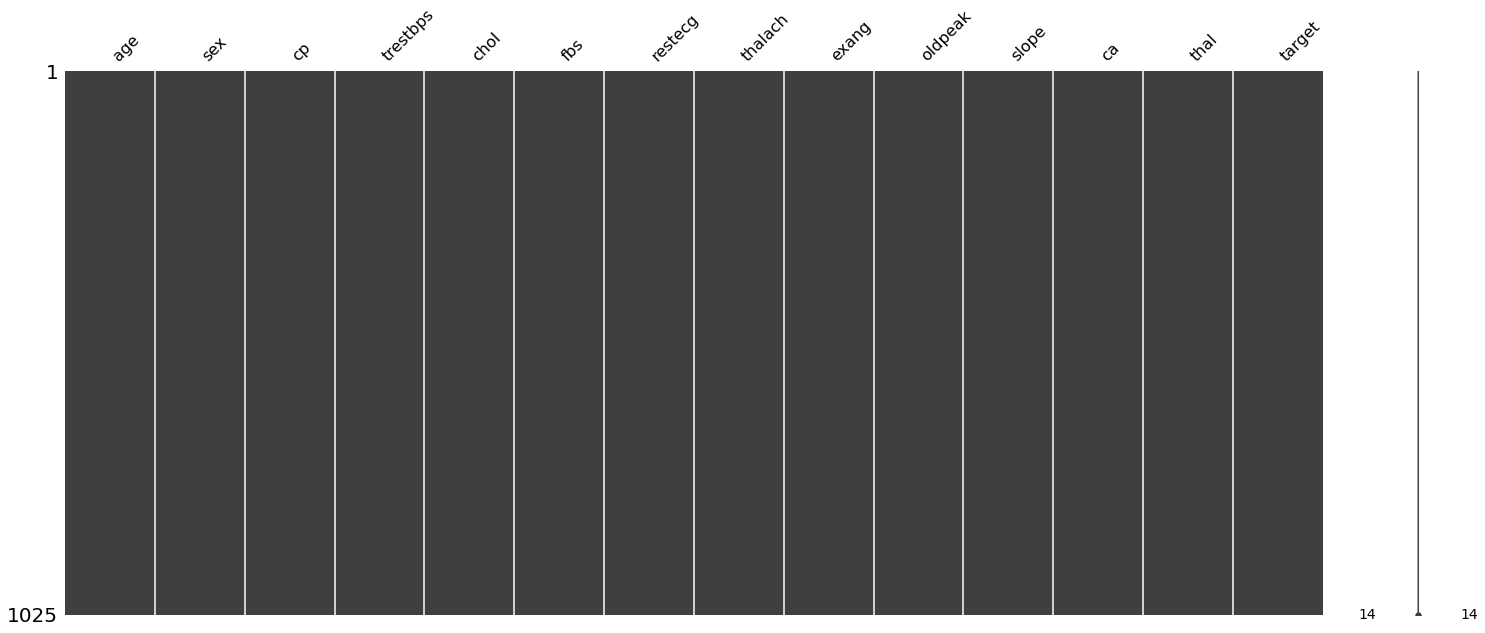

In [9]:
import missingno as msno
msno.matrix(df)

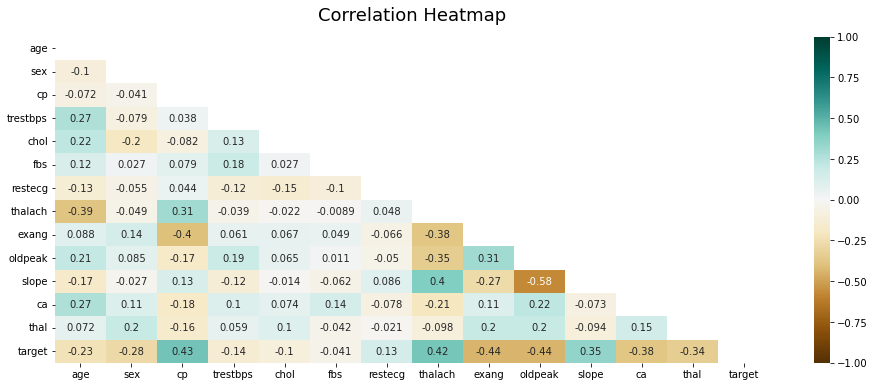

In [10]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [11]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

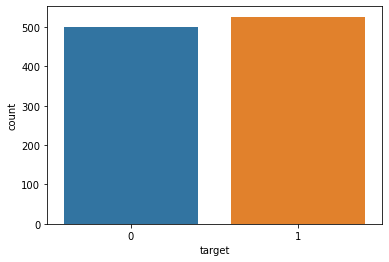

In [12]:
sns.countplot(data=df, x=df['target'])

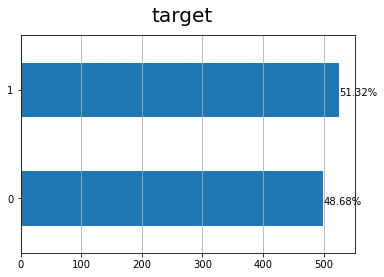

In [13]:
x = 'target'

ax = df[x].value_counts().sort_values().plot(kind='barh')
totals = []

for i in ax.patches:
    totals.append(i.get_width())
    
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.2,
    str(round((i.get_width()/total)*100, 2)) + '%',
    fontsize = 10, color = 'black')
    
ax.grid(axis='x')
plt.suptitle(x, fontsize=20)
plt.show()

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [15]:
X = df.drop('target', axis=1)
y = df['target'].values.reshape(-1,1)

In [16]:
from sklearn.preprocessing import RobustScaler
r_scaler = RobustScaler()
X = r_scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=400, stratify=y)

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

In [19]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [20]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [21]:
train_loader = DataLoader(train_dataset, batch_size=124, shuffle=True)
test_loader = DataLoader(test_dataset, shuffle=True)

In [22]:
X_train.shape

torch.Size([820, 13])

In [23]:
y_train.shape

torch.Size([820, 1])

In [24]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(13,64)
        self.fc2 = nn.Linear(64,128)
        self.fc3 = nn.Linear(128,256)
        self.out = nn.Linear(256,1)
        
    def forward(self, X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = self.out(X)
        return X

In [25]:
model = Model()

In [26]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn=nn*s
        pp+=nn
    return pp

In [27]:
get_n_params(model)

42497

In [28]:
num_epochs = 120
l_rate = 0.05
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(model.parameters(), lr=l_rate)

In [29]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    
    correct_results_sum = (y_pred_tag==y_test).sum().float()
    acc = correct_results_sum / y_test.shape[0]
    acc = torch.round(acc*100)
    return acc

In [30]:
model.train()
for e in range(1, num_epochs+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.float())
        acc = binary_acc(y_pred, y_batch.float())
        
        loss.backward()
        optimizer.step()
        
        epoch_loss +=loss.item()
        epoch_acc +=acc.item()
    print(f'Epoch: {e+0:03}: |Loss:{epoch_loss/len(train_loader):.5f} |Acc: {epoch_acc/len(train_loader):.3f}')

Epoch: 001: |Loss:0.69360 |Acc: 48.714
Epoch: 002: |Loss:0.68946 |Acc: 48.571
Epoch: 003: |Loss:0.68517 |Acc: 48.714
Epoch: 004: |Loss:0.68044 |Acc: 53.857
Epoch: 005: |Loss:0.67586 |Acc: 66.714
Epoch: 006: |Loss:0.67026 |Acc: 71.857
Epoch: 007: |Loss:0.66426 |Acc: 74.143
Epoch: 008: |Loss:0.65782 |Acc: 73.286
Epoch: 009: |Loss:0.64961 |Acc: 74.857
Epoch: 010: |Loss:0.64052 |Acc: 79.143
Epoch: 011: |Loss:0.62908 |Acc: 79.429
Epoch: 012: |Loss:0.61713 |Acc: 80.714
Epoch: 013: |Loss:0.60173 |Acc: 81.429
Epoch: 014: |Loss:0.58694 |Acc: 81.857
Epoch: 015: |Loss:0.56728 |Acc: 81.714
Epoch: 016: |Loss:0.54702 |Acc: 82.286
Epoch: 017: |Loss:0.52756 |Acc: 81.714
Epoch: 018: |Loss:0.51085 |Acc: 81.286
Epoch: 019: |Loss:0.48970 |Acc: 82.143
Epoch: 020: |Loss:0.47038 |Acc: 82.571
Epoch: 021: |Loss:0.45326 |Acc: 82.714
Epoch: 022: |Loss:0.43813 |Acc: 84.000
Epoch: 023: |Loss:0.42517 |Acc: 84.429
Epoch: 024: |Loss:0.41282 |Acc: 84.429
Epoch: 025: |Loss:0.40273 |Acc: 84.571
Epoch: 026: |Loss:0.39228

In [31]:
y_pred_list=[]
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        torch.no_grad()
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.numpy())
        
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

         0.0       0.53      0.48      0.50       100
         1.0       0.54      0.59      0.57       105

    accuracy                           0.54       205
   macro avg       0.54      0.54      0.53       205
weighted avg       0.54      0.54      0.54       205



In [34]:
print(confusion_matrix(y_test, y_pred_list))

[[48 52]
 [43 62]]


Use MLP with 2 hidden layers containing 6 and 4 units respectively. Do not use pytorch, 
keras, tensorflow or any other libraries. You should create NN from scratch. 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=111, shuffle=True)

In [40]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
y_train = np.array(y_train, dtype=np.int64).reshape(len(y_train),1)
y_test = np.array(y_test, dtype=np.int64).reshape(len(y_test),1)

In [42]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        self.weights = [np.random.rand(input_size, hidden_sizes[0])]
        self.biases = [np.zeros((1, hidden_sizes[0]))]
        
        for i in range(1, len(hidden_sizes)):
            self.weights.append(np.random.rand(hidden_sizes[i-1], hidden_sizes[i]))
            self.biases.append(np.zeros((1, hidden_sizes[i])))
        
        self.weights.append(np.random.rand(hidden_sizes[-1], output_size))
        self.biases.append(np.zeros((1, output_size)))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, x):
        self.layer_outputs = [x]
        
        for i in range(len(self.weights)):
            layer_input = np.dot(self.layer_outputs[i], self.weights[i]) + self.biases[i]
            layer_output = self.sigmoid(layer_input)
            self.layer_outputs.append(layer_output)
        
        return self.layer_outputs[-1]
        
    def backward(self, x, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)

        for i in range(len(self.weights) - 1, -1, -1):
            self.weights[i] += self.learning_rate * np.dot(self.layer_outputs[i].T, self.output_delta)
            self.biases[i] += self.learning_rate * np.sum(self.output_delta, axis=0, keepdims=True)

            hidden_error = np.dot(self.output_delta, self.weights[i].T)
            hidden_delta = hidden_error * self.sigmoid_derivative(self.layer_outputs[i])

            self.output_delta = hidden_delta
    
    def train(self, x, y, epochs, batch_size):
        for epoch in range(epochs):
            for batch_start in range(0, len(x), batch_size):
                batch_end = batch_start + batch_size
                batch_x = x[batch_start:batch_end]
                batch_y = y[batch_start:batch_end]

                output = self.forward(batch_x)
                self.backward(batch_x, batch_y, output)

            batch_predictions = self.predict(batch_x)
            loss = np.mean(np.square(batch_y - batch_predictions))
            if epoch % 20 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    def predict(self, x):
        return self.forward(x)

In [43]:
learning_rate = 0.03
input_size = X_train.shape[1]
hidden_sizes = [6, 4]
output_size = 1
epochs = 200
batch_size = 50

In [44]:
nn = NeuralNetwork(input_size, hidden_sizes, output_size, learning_rate)

In [45]:
nn.train(X_train, y_train, epochs, batch_size)

Epoch 0, Loss: 0.2513
Epoch 20, Loss: 0.1854
Epoch 40, Loss: 0.0966
Epoch 60, Loss: 0.0748
Epoch 80, Loss: 0.0575
Epoch 100, Loss: 0.0472
Epoch 120, Loss: 0.0413
Epoch 140, Loss: 0.0373
Epoch 160, Loss: 0.0349
Epoch 180, Loss: 0.0315


In [46]:
y_pred = np.round(nn.predict(X_test))

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       121
           1       0.93      0.90      0.92       125

    accuracy                           0.92       246
   macro avg       0.92      0.92      0.92       246
weighted avg       0.92      0.92      0.92       246



In [48]:
print(confusion_matrix(y_test, y_pred))

[[113   8]
 [ 12 113]]
